### Packages

In [27]:
import pandas as pkg_pandas
from matplotlib import pyplot as pkg_plot

### Raw Data

#### Pre-Work

In [28]:
baseline_df = pkg_pandas.read_csv("../data/cbex-hr-analytics-raw.csv")
baseline_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Plot: Satisfaction Level (x-axis) x Retention Failure (y-axis)

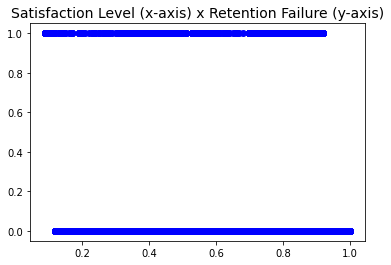

In [29]:
%matplotlib inline
pkg_plot.title(label='Satisfaction Level (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.satisfaction_level, baseline_df.left, color='blue', marker='o')

#### Plot: Last Evaluation (x-axis) x Retention Failure (y-axis)

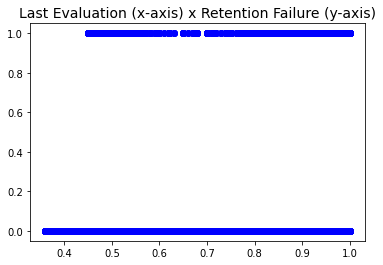

In [30]:
%matplotlib inline
pkg_plot.title(label='Last Evaluation (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.last_evaluation, baseline_df.left, color='blue', marker='o')

#### Plot: Project Number (x-axis) x Retention Failure (y-axis)

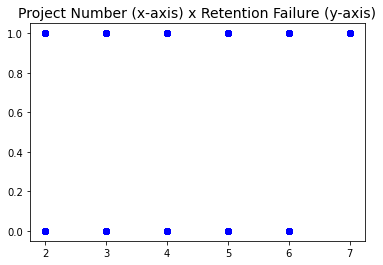

In [31]:
%matplotlib inline
pkg_plot.title(label='Project Number (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.number_project, baseline_df.left, color='blue', marker='o')

#### Plot: Working Hours (x-axis) x Retention Failure (y-axis)

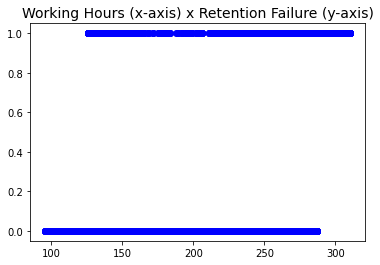

In [32]:
%matplotlib inline
pkg_plot.title(label='Working Hours (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.average_montly_hours, baseline_df.left, color='blue', marker='o')

#### Plot: Service Period (x-axis) x Retention Failure (y-axis)

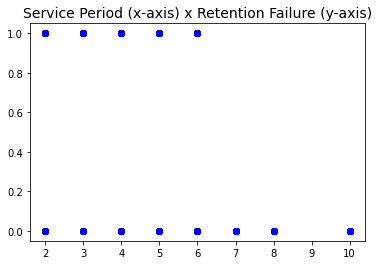

In [33]:
%matplotlib inline
pkg_plot.title(label='Service Period (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.time_spend_company, baseline_df.left, color='blue', marker='o')

#### Plot: Promotion in Last 5-Years (x-axis) x Retention Failure (y-axis)

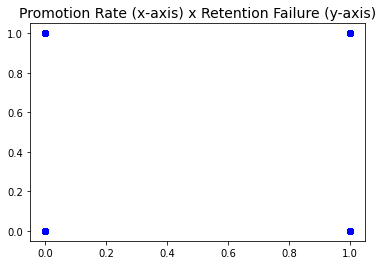

In [34]:
%matplotlib inline
pkg_plot.title(label='Promotion Rate (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.promotion_last_5years, baseline_df.left, color='blue', marker='o')

#### Plot: Department (x-axis) x Retention Failure (y-axis)

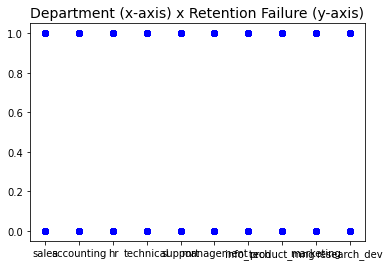

In [35]:
%matplotlib inline
pkg_plot.title(label='Department (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.department, baseline_df.left, color='blue', marker='o')

#### Plot: Salary Range (x-axis) x Retention Failure (y-axis)

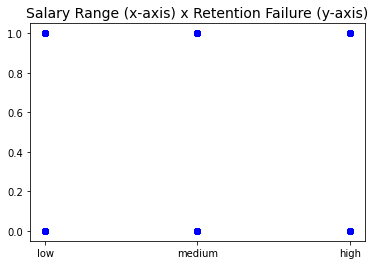

In [36]:
%matplotlib inline
pkg_plot.title(label='Salary Range (x-axis) x Retention Failure (y-axis)', fontsize=14)
pkg_plot.scatter(baseline_df.salary, baseline_df.left, color='blue', marker='o')

### Group By: Single Field

#### Pre-Work

In [37]:
def get_group_employee_retention_ratios(dataset_df, group_name):
    group_ratio_df = pkg_pandas.DataFrame(columns=[group_name,'remained','left'])
    groups = dataset_df.groupby([group_name])
    for group_key, group_value_set in groups:
        sub_groups = group_value_set.groupby(['left'])
        left_count = remained_count = 0
        left_ratio = remained_ratio = 0.00
        for sub_group_key, sub_group_value_set in sub_groups:
            if (sub_group_key == 0): remained_count = len(sub_group_value_set)
            if (sub_group_key == 1): left_count = len(sub_group_value_set)
        remained_ratio = remained_count * 100 / (left_count + remained_count)
        left_ratio = left_count * 100 / (left_count + remained_count)
        group_ratio_df.loc[len(group_ratio_df)] = [group_key, remained_ratio, left_ratio]

    return group_ratio_df

#### Group By: Salary

In [38]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, group_name='salary')
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-salary-employee-retentions.csv", index=False)
ratio_df

,salary,remained,left
0,high,93.371059,6.628941
1,low,70.311646,29.688354
2,medium,79.568725,20.431275


<AxesSubplot:title={'center':'Salary Ranges (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='salary'>

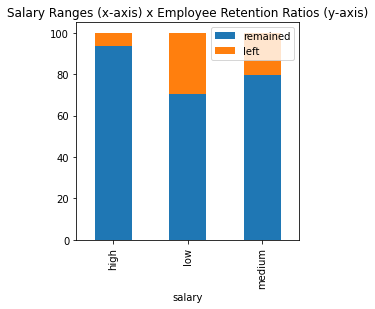

In [39]:
ratio_df.plot(x='salary', kind='bar', stacked=True, \
    title='Salary Ranges (x-axis) x Employee Retention Ratios (y-axis)', figsize=(4,4))

**Observations (Salary):**
- High salary employee group has low attrition rate: ~7%
- Low salary employee group has high attrition rate: ~30%
- Salary has definite influence on employee attrition

#### Group By: Department

In [40]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, group_name='department')
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-department-employee-retentions.csv", index=False)
ratio_df

,department,remained,left
0,accounting,73.402868,26.597132
1,hr,70.906631,29.093369
2,info_tech,77.750611,22.249389
3,management,85.555556,14.444444
4,marketing,76.340326,23.659674
5,product_mng,78.048780,21.951220
6,research_dev,84.625159,15.374841
7,sales,75.507246,24.492754
8,support,75.100942,24.899058
9,technical,74.375000,25.625000


<AxesSubplot:title={'center':'Departments (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='department'>

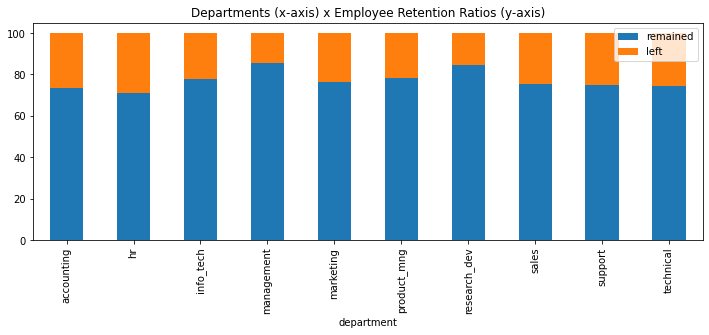

In [41]:
ratio_df.plot(x='department', kind='bar', stacked=True, \
    title='Departments (x-axis) x Employee Retention Ratios (y-axis)', figsize=(12,4))

**Observations (Department)**:
- Research and Development, Management departments have low attrition rate: ~15%
- HR department has high attrition rate: ~29%
- Deparment work style may be the contributor for employee attrition



#### Group By: Project Number

In [42]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, group_name='number_project')
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-project-employee-retentions.csv", index=False)
ratio_df

,number_project,remained,left
0,2.0,34.380235,65.619765
1,3.0,98.224414,1.775586
2,4.0,90.630011,9.369989
3,5.0,77.834118,22.165882
4,6.0,44.207836,55.792164
5,7.0,0.000000,100.000000


<AxesSubplot:title={'center':'Project Number (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='number_project'>

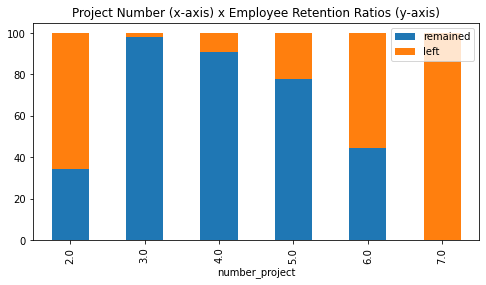

In [43]:
ratio_df.plot(x='number_project', kind='bar', stacked=True, \
    title='Project Number (x-axis) x Employee Retention Ratios (y-axis)', figsize=(8,4))

**Observations (Project Number)**:
- Project 7 has very high attrition rate: ~100%
- Projects 2,6 have high attrition rate: ~55-65%
- Project 3 has very low attrition rate: ~2%  

#### Group By: Service Period

In [44]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, group_name='time_spend_company')
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-service-period-employee-retentions.csv", index=False)
ratio_df

,time_spend_company,remained,left
0,2.0,98.366215,1.633785
1,3.0,75.384138,24.615862
2,4.0,65.193586,34.806414
3,5.0,43.448744,56.551256
4,6.0,70.891365,29.108635
5,7.0,100.000000,0.000000
6,8.0,100.000000,0.000000
7,10.0,100.000000,0.000000


<AxesSubplot:title={'center':'Service Period (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='time_spend_company'>

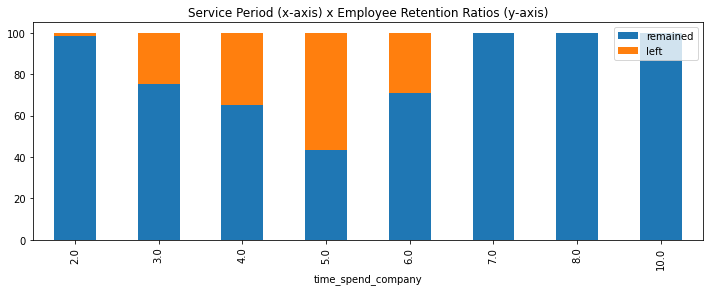

In [45]:
ratio_df.plot(x='time_spend_company', kind='bar', stacked=True, \
    title='Service Period (x-axis) x Employee Retention Ratios (y-axis)', figsize=(12,4))

**Observations (Service Period)**:
- Service Period less than 2 years has low attrition rate: ~2%
- Service Period more than 7 years has have very low attrition rate: ~0%
- Service Period of 5 years has very high attrition rate: ~57%
- Service Period of 3,4,6 years have moderate attrition rate: ~24%-34%

#### Group By: Promoted

In [46]:
ratio_df = get_group_employee_retention_ratios(dataset_df=baseline_df, group_name='promotion_last_5years')
ratio_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-promoted-employee-retentions.csv", index=False)
ratio_df

,promotion_last_5years,remained,left
0,0.0,75.803815,24.196185
1,1.0,94.043887,5.956113


<AxesSubplot:title={'center':'Promoted (x-axis) x Employee Retention Ratios (y-axis)'}, xlabel='promotion_last_5years'>

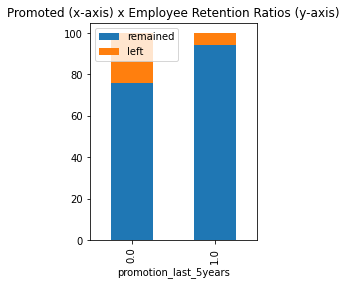

In [47]:
ratio_df.plot(x='promotion_last_5years', kind='bar', stacked=True, \
    title='Promoted (x-axis) x Employee Retention Ratios (y-axis)', figsize=(3,4))

**Observations (Promoted):**
- Promoted has low attrition rate: ~6%
- Not Promoted has high attrition rate: ~24% 

### Encode: Single Field

**Encode**: Encode non-numerical value columns into dummy-variable columns

#### Pre-Work

In [48]:
def get_filed_dummies(dataset_df, field_name):
    field_dummies = pkg_pandas.get_dummies(dataset_df[field_name])

    field_values = field_dummies.columns
    print("DEBUG:: get_field_dummies: value count = {}".format(len(field_values)))
    print("DEBUG:: get_field_dummies: values = {}".format(field_values))
    field_value_map = {}

    for i in range(len(field_values)):
        field_value_map[field_values[i]] = field_name + "_" + field_values[i]

    field_dummies = field_dummies.rename(columns=field_value_map)
    field_dummies = field_dummies.drop(field_value_map[field_values[0]], axis='columns')
    print("DEBUG:: get_field_dummies: drop (first) value = {}".format(field_values[0]))
    return field_dummies

In [49]:
def dummy_encode_field(dataset_df, field_name):
    encoded_dataset_df = dataset_df
    field_dummies = get_filed_dummies(dataset_df=encoded_dataset_df, field_name=field_name)
    encoded_dataset_df = encoded_dataset_df.drop([field_name],axis='columns')
    encoded_dataset_df = pkg_pandas.concat([encoded_dataset_df,field_dummies],axis='columns')
    return encoded_dataset_df

In [50]:
# Initialize
encoded_baseline_df = baseline_df

#### Encode: Department

In [51]:
encoded_baseline_df = dummy_encode_field(encoded_baseline_df, 'department')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded-departments.csv", index=False)
encoded_baseline_df

DEBUG:: get_field_dummies: value count = 10
DEBUG:: get_field_dummies: values = Index(['accounting', 'hr', 'info_tech', 'management', 'marketing',
       'product_mng', 'research_dev', 'sales', 'support', 'technical'],
      dtype='object')
DEBUG:: get_field_dummies: drop (first) value = accounting


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,1,0


#### Encode: Salary

In [52]:
encoded_baseline_df = dummy_encode_field(encoded_baseline_df, 'salary')
encoded_baseline_df.to_csv("../.outputs/.datasets/cbex-hr-analytics-encoded-salaries.csv", index=False)
encoded_baseline_df

DEBUG:: get_field_dummies: value count = 3
DEBUG:: get_field_dummies: values = Index(['high', 'low', 'medium'], dtype='object')
DEBUG:: get_field_dummies: drop (first) value = high


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_hr,department_info_tech,department_management,department_marketing,department_product_mng,department_research_dev,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0
